In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_satus',
               'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital_loss',
               'hours_per_week', 'native_country', 'income']
census_data = pd.read_csv("adult.data", names=column_names)

In [3]:
census_data

,age,workclass,fnlwgt,education,education_num,marital_satus,occupation,relationship,race,sex,capital-gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
census_data.describe()

,age,fnlwgt,education_num,capital-gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [119]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_satus   30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.7+ MB


In [5]:
census_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_satus     0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
census_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
census_data.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [8]:
census_data.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
census_data = census_data[census_data.workclass != ' ?']
census_data = census_data[census_data.occupation != ' ?']
census_data = census_data[census_data.native_country != ' ?']

In [10]:
census_data

,age,workclass,fnlwgt,education,education_num,marital_satus,occupation,relationship,race,sex,capital-gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
census_data.duplicated().sum()

23

In [12]:
census_data.drop_duplicates()

,age,workclass,fnlwgt,education,education_num,marital_satus,occupation,relationship,race,sex,capital-gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [53]:
income_count= census_data.income.value_counts()

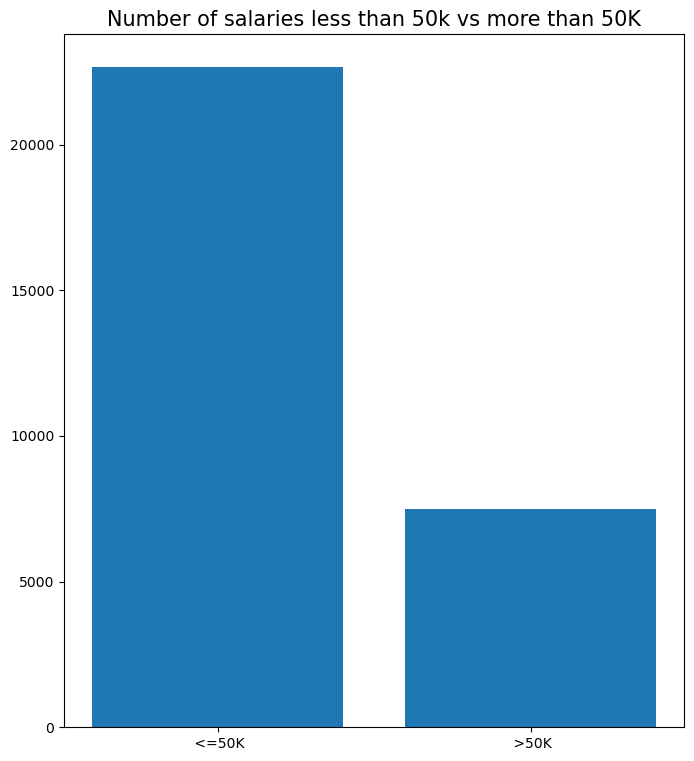

In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots( figsize=(8, 9))

plt.bar(income_count.index, income_count)
ax.set_title("Number of salaries less than 50k vs more than 50K", size = 15)

plt.show()

In [58]:
sex_count= census_data.sex.value_counts()

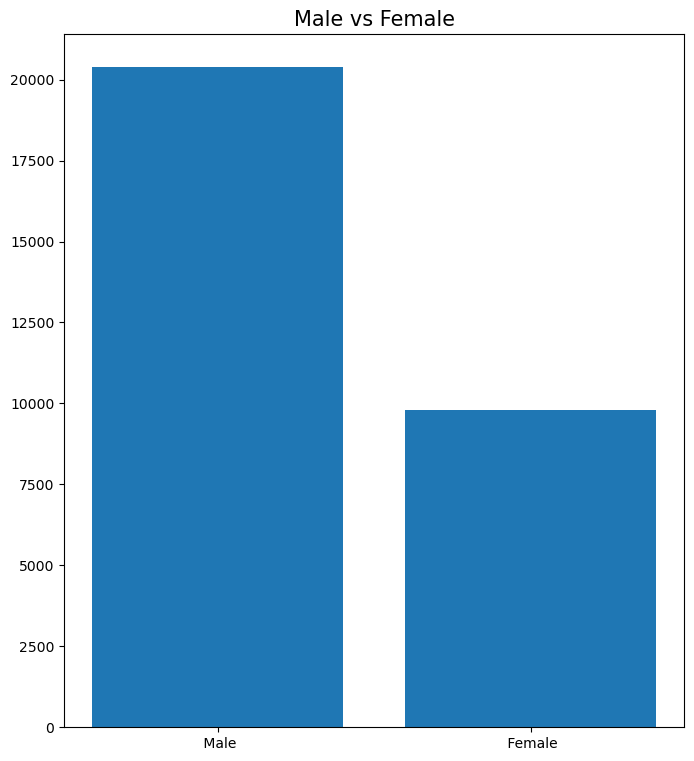

In [76]:
fig, ax = plt.subplots( figsize=(8, 9))

ax.bar(sex_count.index, sex_count)
ax.set_title("Male vs Female", size = 15)

plt.show()

In [61]:
race_count= census_data.race.value_counts()

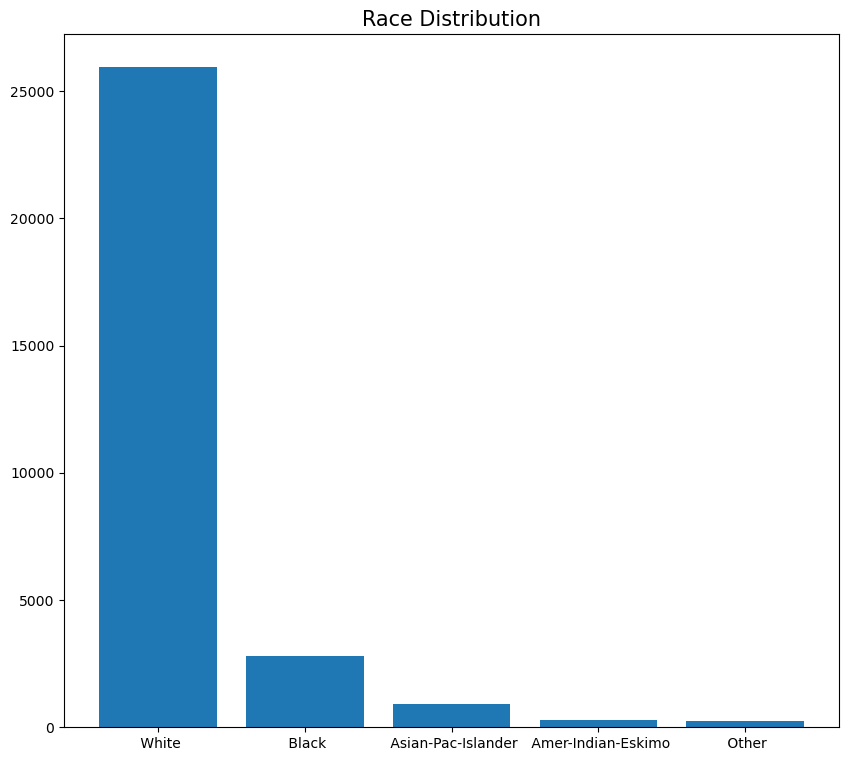

In [63]:
fig, ax = plt.subplots( figsize=(8, 9))

ax.bar(race_count.index, race_count)
ax.set_title("Race Distribution", size = 15)

plt.show()

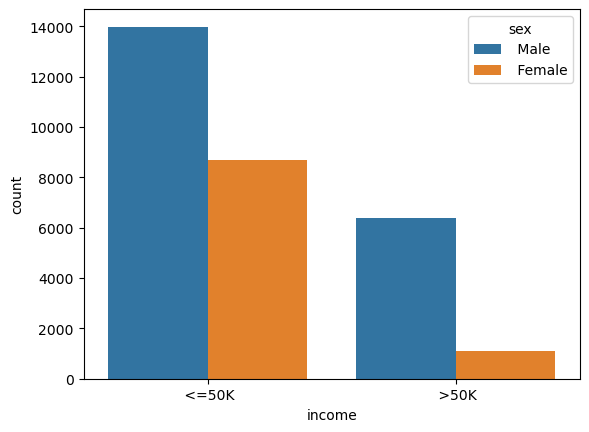

In [108]:
sns.countplot(x="income", data=census_data, hue='sex')
plt.show()

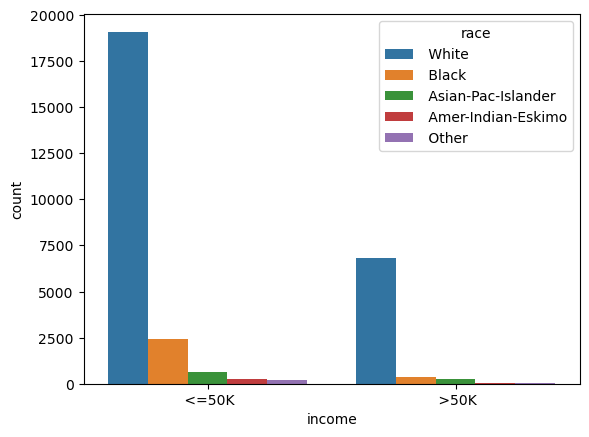

In [109]:
sns.countplot(x="income", data=census_data, hue='race')
plt.show()

In [114]:
census_data.age.value_counts().sort_index()

17    328
18    447
19    594
20    629
21    621
     ... 
84      8
85      3
86      1
88      3
90     35
Name: age, Length: 72, dtype: int64

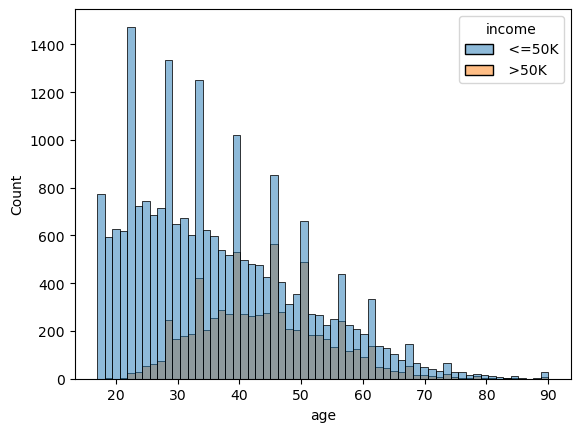

In [117]:
sns.histplot(data=census_data, x='age', hue='income')
plt.show()

In [13]:
X = pd.get_dummies(census_data, columns=['workclass', 'education', 'marital_satus',
               'occupation', 'relationship', 'race', 'sex','native_country', 'income'], drop_first = True)

In [14]:
X

,age,fnlwgt,education_num,capital-gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
X.columns

Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital_loss',
       'hours_per_week', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital_satus_ Married-AF-spouse', 'marital_satus_ Married-civ-spouse',
       'marital_satus_ Married-spouse-absent', 'marital_satus_ Never-married',
       'marital_satus_ Separated', 'marital_satus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       

In [16]:
y = X['income_ >50K']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_ >50K, Length: 30162, dtype: uint8

In [17]:
X = X.drop(['income_ >50K'], axis = 1)
X = X.drop(['fnlwgt'], axis = 1)

In [18]:
X

,age,education_num,capital-gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,0,0,20,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.tree import  DecisionTreeClassifier

tree_cl = DecisionTreeClassifier(random_state=42)
tree_cl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = tree_cl.predict(X_test)

In [25]:
print("accuracy score:", accuracy_score(y_test, y_pred))

accuracy score: 0.8180009945300846


In [26]:
from sklearn.ensemble import RandomForestClassifier
forest_cl = RandomForestClassifier(random_state=42)
forest_cl.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = forest_cl.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

accuracy score: 0.8405436764462125


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,10, 20, 32],
              'n_estimators':[10, 50, 100], 
                          'min_samples_split':[2, 10, 15, 20]}

#creating the GridSearchCV object
grid_search_cv= GridSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=1, cv=3)

#fitting the gridsearch to the data
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
The best parameters are:  {'max_depth': 32, 'min_samples_split': 15, 'n_estimators': 50}


In [30]:
param_grid = {'max_depth':[20,22,25,30,32],
              'n_estimators':[10, 20, 30, 40, 50], 
                          'min_samples_split':[15, 17, 19, 20]}

#creating the GridSearchCV object
grid_search_cv= GridSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=1, cv=3)

#fitting the gridsearch to the data
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The best parameters are:  {'max_depth': 32, 'min_samples_split': 15, 'n_estimators': 50}


In [31]:
optimal_forest_cl = RandomForestClassifier(random_state=42, min_samples_split =15,max_depth= 32, n_estimators=50)
optimal_forest_cl.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=15, n_estimators=50,
                       random_state=42)

In [32]:
y_pred = optimal_forest_cl.predict(X_test)
print("accuracy score:", accuracy_score(y_test, y_pred))

accuracy score: 0.8599370130946461


In [33]:
from sklearn.metrics import mean_squared_error

mse_optimal_forest_cl = round(mean_squared_error(y_test,y_pred), 4)

print("Generalization error for the optimal RandomForestClassifier:",mse_optimal_forest_cl)

Generalization error for the optimal RandomForestClassifier: 0.1401
